In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#function to combine picks and point values
def combine(df1):
    my_file = df1.copy()
    rows = my_file.shape[0]
    i = 2 
    while i < rows:
        for col in my_file.loc[:, my_file.columns != 'Game']:
            my_file[col][i+1] = float(my_file[col][i+1])
            my_file[col][i] = [my_file[col][i], my_file[col][i+1]]
        i = i+2
    
    my_file.drop([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41], axis=0, inplace=True)
    return my_file

#function to calculate totals
def totals(df):
    max_score = 0
    games = len(df.columns)-1
    points = 16
    while games > 0:
        max_score = max_score + points
        points = points - 1
        games = games - 1
    i = 4  
    df['Score'] = 0
    df['Game Count'] = 0
    df['Max Score'] = max_score
    while i < 41:
        for col in df.loc[:, ~df.columns.isin(['Game', 'Score', 'Game Count', 'Max Score'])]:
            if df[col][0] is np.nan:
                break
            
            elif df[col][0] == df[col][i][0]:
                df.loc[i, 'Game Count'] = df.loc[i, 'Game Count'] + 1
                df.loc[i, 'Score'] = df.loc[i, 'Score'] + df.loc[i, col][1]
            
            else:  
                df.loc[i, 'Max Score'] = df.loc[i, 'Max Score'] - df.loc[i, col][1]
               
        i = i + 2
    return df

#upset counter
def upset_counter(df):
    upset_count = 0
    fav_count = 0
    tie_count = 0
    dog_spread_tot = 0
    big_dog_count = 0
    for col in df.loc[:, ~df.columns.isin(['Game', 'Score', 'Max Score'])]:
        if df[col][3] < 0 and df[col][1] == df[col][0]: #if home team is favorite and away team won
            upset_count = upset_count + 1
            dog_spread_tot = dog_spread_tot + -(df[col][3])
            print('Road upset alert ', df[col][0], "spread ", -(df[col][3]))
            if abs(df[col][3]) > 6.5:
                big_dog_count = big_dog_count + 1
                print("big dog woof woof")
        elif df[col][3] > 0 and df[col][2][0] == df[col][0]: #if away team is favorite and home team won
            upset_count = upset_count + 1
            dog_spread_tot = dog_spread_tot + df[col][3]
            print('Home dog win ', df[col][2])
            if abs(df[col][3]) > 6.5:
                big_dog_count = big_dog_count + 1
                print("big dog woof woof")
        elif df[col][0] == "TIE":
            tie_count = tie_count + 1
            print("A friggen tie...  ", df[col][2])
        else:
            fav_count = fav_count + 1
    
    dog_spread_avg = round(dog_spread_tot/upset_count, 2)
    print("Total of ", upset_count, "upsets this week. With ", big_dog_count, "being big dogs." )
    return upset_count, dog_spread_avg, big_dog_count #fav_count, tie_count

#number of total picks for league
def week_pick_percent(week_raw, week_game_total):
    games = len(week_raw.axes[1])-(week_raw.iloc[0].isna().sum() + 1)
    enteries = (len(week_raw.axes[0])-4)/2
    total_picks = games * enteries
    pick_percent = round(week_game_total/total_picks*100, 2)
    
    return pick_percent 

#finds avg points per win for league
def points_per_win (df):
    total_wins = df['Game Count'].sum()
    total_points = df['Score'].sum()
    avg_pts_per_win = total_points/total_wins
    points = round(avg_pts_per_win, 2)
    return points

#sum total points each week
def sum_totals(season_totals, week_stats, week_number_rank):
    season_totals[['Score', 'Game Count']] = season_totals[['Score', 'Game Count']] + week_stats[['Score', 'Game Count']]
    season_totals[week_number_rank] = season_totals['Score'].rank(ascending=False, method='min')

    return season_totals


In [55]:
#read the result files
week1_raw = pd.read_csv("week1_results.csv")
week2_raw = pd.read_csv("Week2_results.csv")
week3_raw = pd.read_csv("week3_results.csv")
week4_raw = pd.read_csv("week4_results.csv")
week5_raw = pd.read_csv("Week5_results.csv")
week6_raw = pd.read_csv("week6_results.csv")
week7_raw = pd.read_csv("week7_results.csv")

#clean data, combine bets with picks
week1 = combine(week1_raw)
week2 = combine(week2_raw)
week3 = combine(week3_raw)
week4 = combine(week4_raw)
week5 = combine(week5_raw)
week6 = combine(week6_raw)
week7 = combine(week7_raw)

#calculate total points and picks
week1_tot = totals(week1)
week2_tot = totals(week2)
week3_tot = totals(week3)
week4_tot = totals(week4)
week5_tot = totals(week5)
week6_tot = totals(week6)
week7_tot = totals(week7)

#create stats df with total points and picks
#also redefine index to username
week1_stats = week1_tot[['Game', 'Score', 'Game Count']][4:]
week1_stats.set_index('Game', inplace=True)
week2_stats = week2_tot[['Game', 'Score', 'Game Count']][4:]
week2_stats.set_index('Game', inplace=True)
week3_stats = week3_tot[['Game', 'Score', 'Game Count']][4:]
week3_stats.set_index('Game', inplace=True)
week4_stats = week4_tot[['Game', 'Score', 'Game Count']][4:]
week4_stats.set_index('Game', inplace=True)
week5_stats = week5_tot[['Game', 'Score', 'Game Count']][4:]
week5_stats.set_index('Game', inplace=True)
week6_stats = week6_tot[['Game', 'Score', 'Game Count']][4:]
week6_stats.set_index('Game', inplace=True)
week7_stats = week7_tot[['Game', 'Score', 'Game Count']][4:]
week7_stats.set_index('Game', inplace=True)

#create season total df 
season_totals = pd.DataFrame(week1_stats.copy(), columns=['Score', 'Game Count'])
season_totals['Week 1 Rank'] = season_totals['Score'].rank(ascending=False, method='min')

#use sum_total function to add points for season total 
sum_totals(season_totals, week2_stats, 'Week 2 Rank')
sum_totals(season_totals, week3_stats, 'Week 3 Rank')
sum_totals(season_totals, week4_stats, 'Week 4 Rank')
sum_totals(season_totals, week5_stats, 'Week 5 Rank')
sum_totals(season_totals, week6_stats, 'Week 6 Rank')
sum_totals(season_totals, week7_stats, 'Week 7 Rank')

#caluculate the position change from the previous week 
season_totals['Rank Change Value'] = round(season_totals[season_totals.columns[len(season_totals.columns)-1]]-season_totals[season_totals.columns[len(season_totals.columns)-2]], 0)

In [56]:
season_totals['Rank Change'] = 0
season_totals[''] = "hey"

i = 0
while i < len(season_totals.index): 
    if season_totals['Rank Change Value'][i] < 0:
        season_totals.loc[season_totals.index[i], ''] = u'\u2191' #up arrow
        season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    elif season_totals['Rank Change Value'][i] == 0: 
        season_totals.loc[season_totals.index[i], ''] = "--"
        season_totals.loc[season_totals.index[i], 'Rank Change'] = 0
    else:
       season_totals.loc[season_totals.index[i], ''] = u'\u2193' #down arrow
       season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    i = i+ 1

In [57]:
season_totals[['Score', 'Game Count', 'Week 7 Rank', 'Rank Change', '']].sort_values(['Week 7 Rank'])

,Score,Game Count,Week 7 Rank,Rank Change,
Game,,,,,
Ken,570,63,1.0,1,↑
Bob Z,565,70,2.0,1,↓
Lindsey,555,63,3.0,1,↑
Zapp,542,65,4.0,1,↓
Wild Bill,531,61,5.0,3,↑
PBW,529,63,6.0,1,↑
taz7611,527,56,7.0,7,↑
Team Boylan,525,58,8.0,0,--
Kathy Zwartz,521,60,9.0,4,↓


In [36]:
week7_stats = week7_tot[['Game', 'Score', 'Game Count', 'Max Score']][4:]
week7_stats['Week 7 Rank'] = week7_stats['Score'].rank(ascending=False)
week7_stats.sort_values(['Max Score'], ascending=False).head()

,Game,Score,Game Count,Max Score,Week 7 Rank
32,taz7611,97,9,106,1.0
16,Lindsey,90,8,104,3.0
26,PBW,82,9,102,5.0
28,Shaner,91,8,100,2.0
38,Wild Bill,86,9,94,4.0


In [ ]:
#upset count
upset_count1 = upset_counter(week1)
upset_count2 = upset_counter(week2)
upset_count3 = upset_counter(week3)
upset_count4 = upset_counter(week4)
upset_count5 = upset_counter(week5)
upset_count6 = upset_counter(week6)
upset_count7 = upset_counter(week7)

In [30]:
max1 = week1_stats['Game Count'].nlargest(2)
min1 = week1_stats.min()
med1 = week6_stats['Game Count'].median()
max1

Game
Kathy Zwartz    13
Bob Z           11
Name: Game Count, dtype: int64

In [58]:
tots = {'Week': 1, 'Correct Pick Percentage': week_pick_percent(week1_raw, week1_stats['Game Count'].sum()), 'Avg Points per Win': points_per_win(week1_stats), 'Winner Pts': week1_stats['Score'].max(), 'Worst Player Pts': week1_stats['Score'].min(), 'Number of Upsets': upset_count1[0]}
weekly_stats = pd.DataFrame(tots, index=[0])
weekly_stats.loc[len(weekly_stats.index)] = [2, week_pick_percent(week2_raw, week2_stats['Game Count'].sum()), points_per_win(week2_stats), week2_stats['Score'].max(), week2_stats['Score'].min(), upset_count2[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [3, week_pick_percent(week3_raw, week3_stats['Game Count'].sum()), points_per_win(week3_stats), week3_stats['Score'].max(), week3_stats['Score'].min(), upset_count3[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [4, week_pick_percent(week4_raw, week4_stats['Game Count'].sum()), points_per_win(week4_stats), week4_stats['Score'].max(), week4_stats['Score'].min(), upset_count4[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [5, week_pick_percent(week5_raw, week5_stats['Game Count'].sum()), points_per_win(week5_stats), week5_stats['Score'].max(), week5_stats['Score'].min(), upset_count5[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [6, week_pick_percent(week6_raw, week6_stats['Game Count'].sum()), points_per_win(week6_stats), week6_stats['Score'].max(), week6_stats['Score'].min(), upset_count6[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [7, week_pick_percent(week7_raw, week7_stats['Game Count'].sum()), points_per_win(week7_stats), week7_stats['Score'].max(), week7_stats['Score'].min(), upset_count7[0]] 

weekly_stats



,Week,Correct Pick Percentage,Avg Points per Win,Winner Pts,Worst Player Pts,Number of Upsets
0,1.0,51.97,7.41,97.0,45.0,6.0
1,2.0,52.96,9.05,114.0,48.0,5.0
2,3.0,50.00,8.53,107.0,40.0,9.0
3,4.0,57.57,8.78,108.0,51.0,5.0
4,5.0,61.84,9.12,117.0,58.0,4.0
5,6.0,53.76,8.80,96.0,43.0,7.0
6,7.0,61.40,9.96,97.0,41.0,6.0


Text(0.5, 0, 'Week')

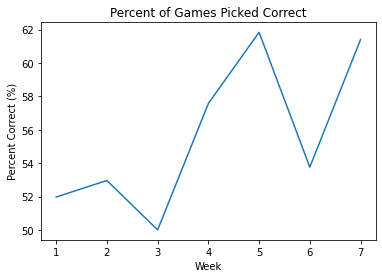

In [59]:
plt.plot(weekly_stats['Week'], weekly_stats['Correct Pick Percentage'])
plt.title('Percent of Games Picked Correct')
plt.ylabel('Percent Correct (%)')
#plt.ylim([25, 75])
plt.xlabel("Week")

In [265]:
#create weely totals df to track totals each week
weekly_totals = pd.concat([week1_stats.rename(columns={"Score": "Week 1 Score", "Game Count": "Week 1 Game Count"}),
 week2_stats.rename(columns={"Score": "Week 2 Score", "Game Count": "Week 2 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week3_stats.rename(columns={"Score": "Week 3 Score", "Game Count": "Week 3 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week4_stats.rename(columns={"Score": "Week 4 Score", "Game Count": "Week 4 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week5_stats.rename(columns={"Score": "Week 5 Score", "Game Count": "Week 5 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week6_stats.rename(columns={"Score": "Week 6 Score", "Game Count": "Week 6 Game Count"})], axis=1)